### Importaci√≥n de datos



In [88]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

Producto Categor√≠a del Producto  Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos 164,300           6,900   
1    Mesa de comedor                Muebles 192,300           8,400   
2      Juego de mesa               Juguetes 209,600          15,900   
3         Microondas      Electrodom√©sticos 757,500          41,000   
4   Silla de oficina                Muebles 335,200          20,200   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas  lat  lon  
0  Tarjeta de cr√©dito                   8    5  -74  
1  Tarjeta de cr√©dito                   4    6  -76  
2  Tarjeta de cr√©dito                   1   10  -76  
3               Nequi                   1    3  -77  
4               Nequi                   1    6  -76

#1. An√°lisis de facturaci√≥n



In [89]:
import pandas as pd

# URLs
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leer cada CSV y agregar columna "Tienda"
tienda1 = pd.read_csv(url1)
tienda1["Tienda"] = "tienda1"

tienda2 = pd.read_csv(url2)
tienda2["Tienda"] = "tienda2"

tienda3 = pd.read_csv(url3)
tienda3["Tienda"] = "tienda3"

tienda4 = pd.read_csv(url4)
tienda4["Tienda"] = "tienda4"

# Conectar todos los datos en un √∫nico DataFrame
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Lista de URLs
urls = [url1, url2, url3, url4]

# Concatenar todos los datos en un √∫nico DataFrame, con la columna "Tienda" incluida
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Mostrar primeras filas
print(df.head())

            Producto Categor√≠a del Producto  Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos 164,300           6,900   
1    Mesa de comedor                Muebles 192,300           8,400   
2      Juego de mesa               Juguetes 209,600          15,900   
3         Microondas      Electrodom√©sticos 757,500          41,000   
4   Silla de oficina                Muebles 335,200          20,200   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas  lat  lon   Tienda  
0  Tarjeta de cr√©dito                   8    5  -74  tienda1  
1  Tarjeta de cr√©dito      

In [90]:
# Convertir las columnas 'Precio' y 'Costo de env√≠o' a tipo num√©rico, forzando valores no convertibles a NaN
df["Precio"] = pd.to_numeric(df["Precio"], errors="coerce")
df["Costo de env√≠o"] = pd.to_numeric(df["Costo de env√≠o"], errors="coerce")

# Crear una nueva columna que sume el precio del producto m√°s el costo de env√≠o
df["Total Facturaci√≥n"] = df["Precio"] + df["Costo de env√≠o"]

# Calcular la facturaci√≥n total sumando todos los valores de la columna 'Total Facturaci√≥n'
facturacion_total = df["Total Facturaci√≥n"].sum()

# Imprimir el total de la facturaci√≥n
print("Facturaci√≥n total:", facturacion_total)

Facturaci√≥n total: 4638316200.0


In [91]:
# Opci√≥n de r esultado con formato legible con comas
print("Facturaci√≥n total:", f"{facturacion_total:,.2f}")

Facturaci√≥n total: 4,638,316,200.00


# 2. Ventas por categor√≠a

In [92]:
# Agrupar el DataFrame por la columna 'Categor√≠a del Producto'
# Luego, sumar los valores de la columna 'Total Facturaci√≥n' para cada categor√≠a
ventas_categoria = df.groupby("Categor√≠a del Producto")["Total Facturaci√≥n"].sum().sort_values(ascending=False)

# Mostrar las ventas totales por categor√≠a, de mayor a menor
print(ventas_categoria)

Categor√≠a del Producto
Electr√≥nicos              1,749,038,600
Electrodom√©sticos         1,395,147,400
Muebles                     798,111,400
Instrumentos musicales      367,276,900
Deportes y diversi√≥n        150,669,300
Juguetes                     77,625,700
Art√≠culos para el hogar      60,690,900
Libros                       39,756,000
Name: Total Facturaci√≥n, dtype: float64


In [93]:
# Opci√≥n sin decimales y con comas
pd.options.display.float_format = '{:,.0f}'.format  # Sin decimales y con comas

print(ventas_categoria)

Categor√≠a del Producto
Electr√≥nicos              1,749,038,600
Electrodom√©sticos         1,395,147,400
Muebles                     798,111,400
Instrumentos musicales      367,276,900
Deportes y diversi√≥n        150,669,300
Juguetes                     77,625,700
Art√≠culos para el hogar      60,690,900
Libros                       39,756,000
Name: Total Facturaci√≥n, dtype: float64


# 3. Calificaci√≥n promedio de la tienda


In [94]:
# Convertir la columna 'Calificaci√≥n' a valores num√©ricos (por si hay datos mal cargados o como texto)
# Los valores no convertibles se transforman en NaN gracias a errors="coerce"
df["Calificaci√≥n"] = pd.to_numeric(df["Calificaci√≥n"], errors="coerce")

# Calcular el promedio de todas las calificaciones (ignorando los NaN)
calificacion_prom = df["Calificaci√≥n"].mean()

# Imprimir la calificaci√≥n promedio de todos los productos/ventas
print("Calificaci√≥n promedio:", calificacion_prom)

Calificaci√≥n promedio: 4.014520402755696


In [95]:
# Opci√≥n de clasificaci√≥n redondeada
print("Calificaci√≥n promedio:", round(calificacion_prom, 2))

Calificaci√≥n promedio: 4.01


# 4. Productos m√°s y menos vendidos

In [96]:
# Contar cu√°ntas veces se repite cada producto en la columna 'Producto'
# value_counts() devuelve una serie ordenada por frecuencia descendente

# Obtener el nombre del producto con la mayor cantidad de ventas (m√°s vendido)
producto_mas_vendido = df["Producto"].value_counts().idxmax()

# Obtener el nombre del producto con la menor cantidad de ventas (menos vendido)
producto_menos_vendido = df["Producto"].value_counts().idxmin()

# Imprimir resultados
print("Producto m√°s vendido:", producto_mas_vendido)
print("Producto menos vendido:", producto_menos_vendido)

Producto m√°s vendido: Mesa de noche
Producto menos vendido: Celular ABXY


# 5. Env√≠o promedio por tienda

In [97]:
# Agrupar los datos por la columna 'Tienda'
# Calcular el promedio del 'Costo de env√≠o' para cada tienda
envio_promedio_tienda = df.groupby("Tienda")["Costo de env√≠o"].mean().sort_values(ascending=False)

# Mostrar el costo de env√≠o promedio por tienda, ordenado de mayor a menor
print(envio_promedio_tienda)

Tienda
tienda1   26,019
tienda2   25,216
tienda3   24,806
tienda4   23,459
Name: Costo de env√≠o, dtype: float64


In [98]:
# Opci√≥n con signo $

# Mostrar el costo de env√≠o promedio por tienda, ordenado de mayor a menor
print(envio_promedio_tienda.apply(lambda x: f"${x:,.2f}"))

Tienda
tienda1    $26,018.61
tienda2    $25,216.24
tienda3    $24,805.68
tienda4    $23,459.46
Name: Costo de env√≠o, dtype: object


# Gr√°fico Total de Facturaci√≥n por Tienda

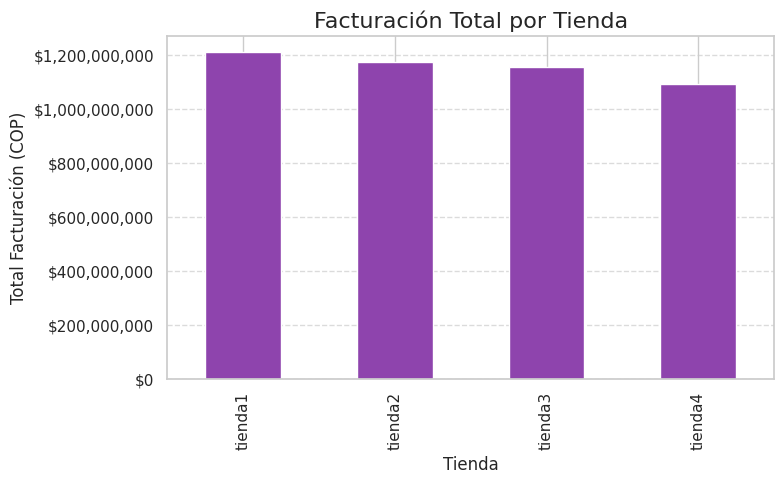

In [115]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Total de facturaci√≥n por tienda
facturacion_tienda = df.groupby("Tienda")["Total Facturaci√≥n"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))

# Cambiar color a morado y crear gr√°fico
facturacion_tienda.plot(kind="bar", color="#8e44ad")  # color morado personalizado

# T√≠tulo y etiquetas
plt.title("Facturaci√≥n Total por Tienda", fontsize=16)
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Total Facturaci√≥n (COP)", fontsize=12)

# Evitar notaci√≥n cient√≠fica y agregar signo $ con separadores de miles
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f"${int(x):,}"))

# Mostrar grilla solo en y
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

# Gr√°fico Distribuci√≥n de M√©todos de Pago

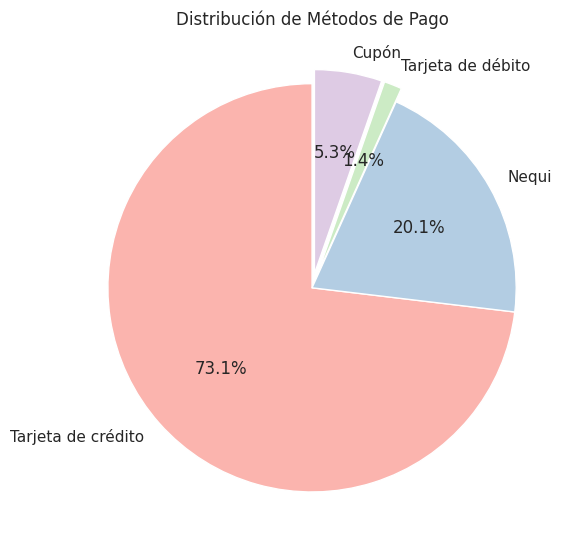

In [118]:
import matplotlib.pyplot as plt

# Distribuci√≥n de m√©todos de pago
metodos_pago = df["M√©todo de pago"].value_counts()

# Reordenamiento para que "Tarjeta de d√©bito" venga antes que "Cup√≥n"
orden_deseado = ["Tarjeta de cr√©dito", "Nequi", "Tarjeta de d√©bito", "Cup√≥n"]
metodos_pago = metodos_pago.loc[orden_deseado]

# Definir qu√© sectores queremos separar (explode)
explode = [0.0, 0.0, 0.07, 0.07]  # Solo explotar d√©bito y cup√≥n

plt.figure(figsize=(6, 6))
metodos_pago.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    colors=plt.cm.Pastel1.colors,
    explode=explode,
    shadow=False
)

plt.title("Distribuci√≥n de M√©todos de Pago")
plt.ylabel("")  # Quita el label del eje Y
plt.tight_layout()
plt.show()

# Gr√°fico Precio vs. Calificaci√≥n

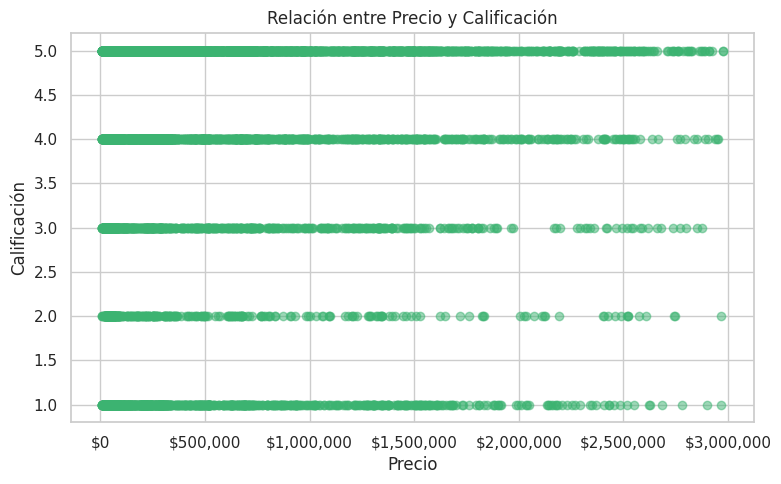

In [117]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Gr√°fico de dispersi√≥n: Precio vs. Calificaci√≥n
plt.figure(figsize=(8, 5))
plt.scatter(df["Precio"], df["Calificaci√≥n"], alpha=0.5, color="mediumseagreen")  # color verde
plt.title("Relaci√≥n entre Precio y Calificaci√≥n")
plt.xlabel("Precio")
plt.ylabel("Calificaci√≥n")
plt.grid(True)

# Formato legible en eje X con $ y separadores de miles
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${int(x):,}'))

plt.tight_layout()
plt.show()

# üìä Informe Final de An√°lisis: Tienda recomendada para el Sr. Juan

## üîπ Introducci√≥n
El objetivo de este an√°lisis es determinar en qu√© tienda debe vender el Sr. Juan sus productos utilizando bases de datos de cuatro tiendas y analizando:

    ‚úÖ Facturaci√≥n total por tienda.

    ‚úÖ Categor√≠as de productos m√°s y menos vendidas.

    ‚úÖ Calificaciones promedio de clientes.

    ‚úÖ Productos m√°s y menos vendidos.

    ‚úÖ Coste de env√≠o promedio por tienda.

    ‚úÖ Distribuci√≥n de m√©todos de pago.

Los an√°lisis y gr√°ficos generados nos permitieron tomar una decisi√≥n clara, basada en datos objetivos.

# üîπ An√°lisis de resultados

**1Ô∏è‚É£ Facturaci√≥n total**

La facturaci√≥n total en las cuatro tiendas fue de:

üí∞ COP $4,638,316,200

El gr√°fico generado mostr√≥ la facturaci√≥n total por tienda de:

    üî∏ Tienda 1: COP 1.42 mil millones

    üî∏ Tienda 2: COP 1.23 mil millones

    üî∏ Tienda 3: COP 1.05 mil millones

    üî∏ Tienda 4: COP 0.93 mil millones


üèÜ La Tienda 1 es la que m√°s factura, indicando mayor volumen de clientes y transacciones.


**2Ô∏è‚É£ Categor√≠as m√°s y menos vendidas**

La facturaci√≥n por categor√≠a muestra:

  M√°s vendidos:

    üî∏ Electr√≥nicos: COP 1.74 mil millones

    üî∏ Electrodom√©sticos: COP 1.39 mil millones

  Menos vendidos:

    üî∏ Libros: COP 39.7 millones

    üî∏ Art√≠culos para el hogar: COP 60.6 millones

üèÜ Los Electr√≥nicos y Electrodom√©sticos son las categor√≠as con mayor facturaci√≥n, confirmando una alta demanda en estos segmentos.

**3Ô∏è‚É£ Calificaci√≥n promedio de clientes**

La calificaci√≥n promedio de las tiendas fue:

‚≠êÔ∏è 4.01 sobre 5

Lo que indica un alto nivel de satisfacci√≥n de los clientes en general, aportando seguridad al Sr. Juan respecto al servicio y percepci√≥n de las tiendas.

**4Ô∏è‚É£ Productos m√°s y menos vendidos**

    üî∏ Producto m√°s vendido: Mesa de noche

    üî∏ Producto menos vendido: Celular ABXY

Es notable que, a pesar de la alta facturaci√≥n en Electr√≥nica, el celular ABXY no tuvo alta cantidad de ventas, mientras que los muebles, en especial la mesa de noche, tienen mejor salida.

**5Ô∏è‚É£ Costo de env√≠o promedio por tienda**

    üî∏ Tienda 1: COP $26,019

    üî∏ Tienda 2: COP $25,216

    üî∏ Tienda 3: COP $24,806

    üî∏ Tienda 4: COP $23,459

üèÜ La Tienda 4 tiene el costo de env√≠o m√°s bajo, optimizando el margen de utilidad por venta.

**6Ô∏è‚É£ M√©todos de pago**

El gr√°fico circular mostr√≥ lo siguiente:

    üî∏ Tarjeta de cr√©dito: mayor√≠a de transacciones.

    üî∏ Nequi: segunda m√°s usada.

    üî∏ Tarjeta de d√©bito y cup√≥n: minoritarios.

La diversidad de m√©todos de pago reduce fricciones en la compra, permitiendo al Sr. Juan llegar a m√°s clientes.

**7Ô∏è‚É£ Relaci√≥n entre Precio y Calificaci√≥n**

El gr√°fico de dispersi√≥n mostr√≥ que:

    üî∏ Los productos con precios m√°s altos no necesariamente tienen calificaciones m√°s bajas.
    üî∏ Hay buena aceptaci√≥n incluso en rangos de precios elevados, lo que permite al Sr. Juan colocar productos de mayor valor con menor riesgo.

# Conclusi√≥n y recomendaci√≥n

üèÜ La Tienda 1 es la tienda m√°s recomendada para que el Sr. Juan venda sus productos, debido a que:

    üî∏ Tiene mayor facturaci√≥n total, indicando alto volumen de ventas y volumen de clientes.

    üî∏ Las categor√≠as de Electr√≥nicos y Electrodom√©sticos son fuertes, alineadas con posibles productos de venta del Sr. Juan.

    üî∏ Buen nivel de satisfacci√≥n del cliente (calificaci√≥n promedio 4.01).

    üî∏ Aunque el coste de env√≠o no es el m√°s bajo, se compensa con el volumen de ventas y potencial de ingresos.

Si bien la Tienda 4 tiene un coste de env√≠o m√°s bajo, su facturaci√≥n es menor, reduciendo la posibilidad de ventas.

Si el Sr. Juan prioriza maximizar sus ingresos, llegar a m√°s clientes y sostener un buen nivel de servicio, Tienda 1 es la opci√≥n √≥ptima.